# 5.4 Excercises Conceptual

## 1 - Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that $α$ given by (5.6) does indeed minimize $Var(αX + (1 − α)Y )$.

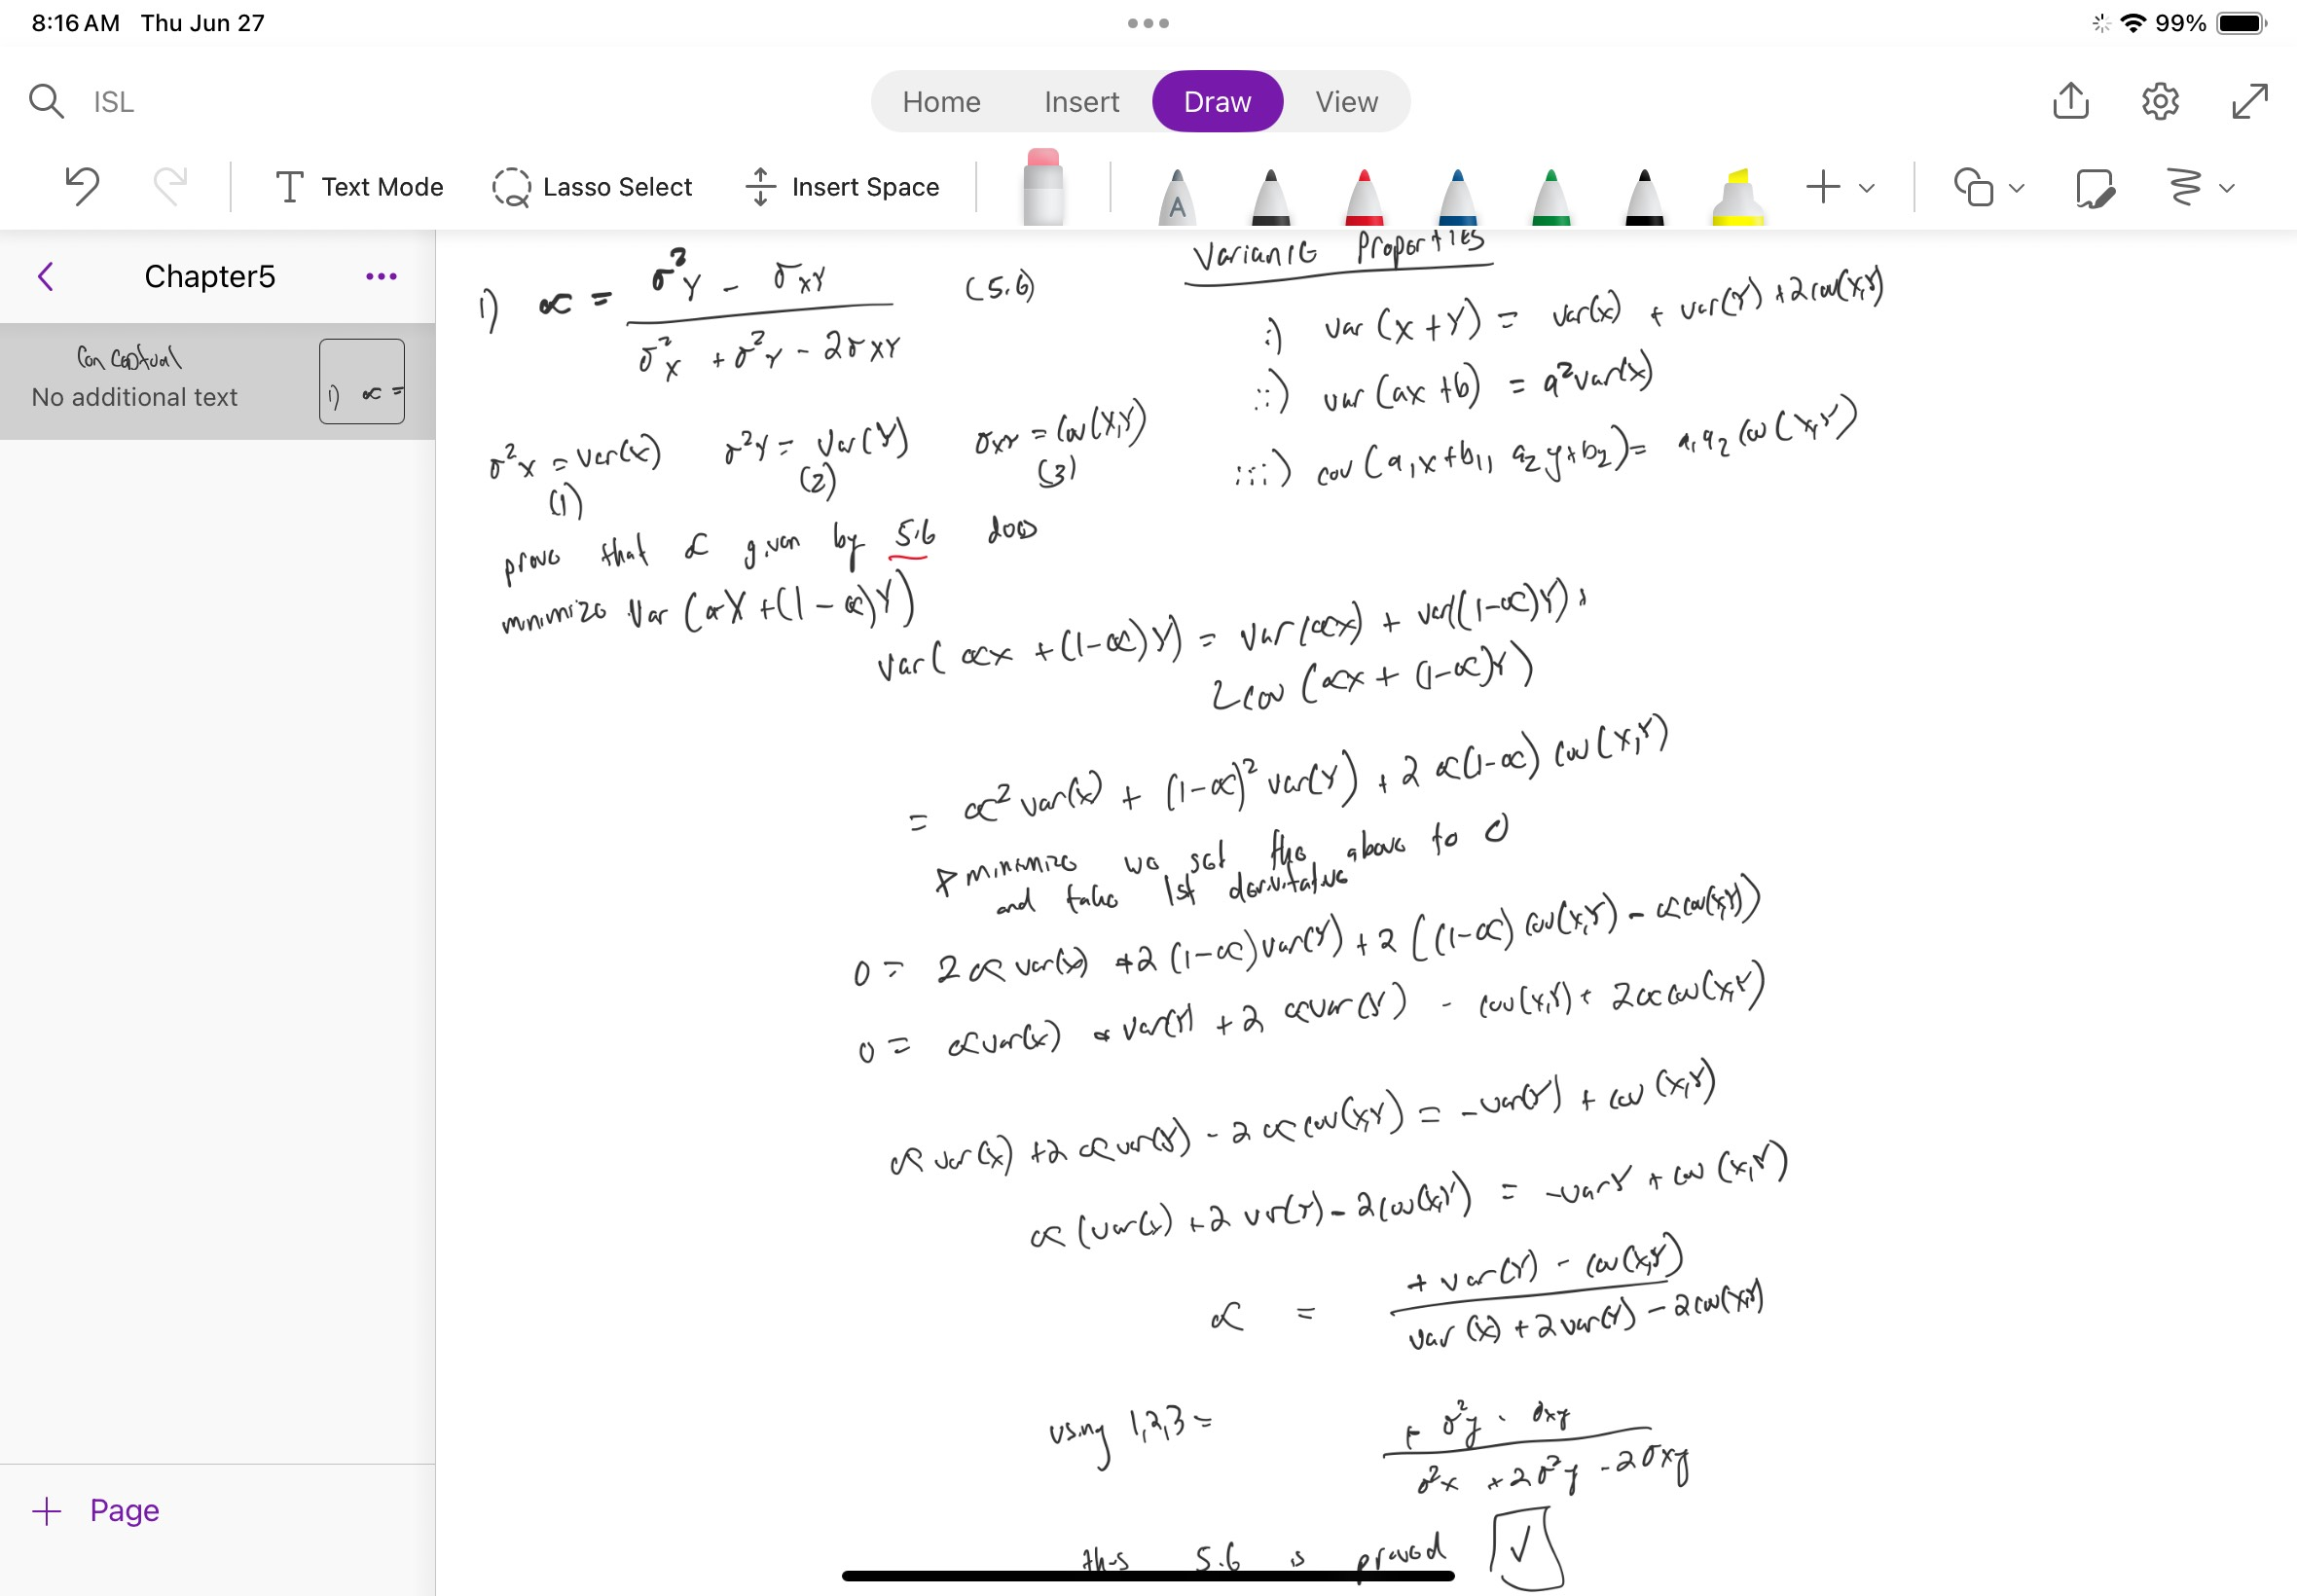

## Question 2 - We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

### (a) - What is the probability that the frst bootstrap observation is not the jth observation from the original sample? Justify your answer.

### (b) - What is the probability that the second bootstrap observation is not the jth observation from the original sample?

### (c) - Argue that the probability that the jth observation is not in the bootstrap sample is $ (1-  \frac{1}{n})^{n} $.

### (d) - When n = 5, what is the probability that the jth observation is in the bootstrap sample?

### (e) - When n = 100, what is the probability that the jth observation is in the bootstrap sample?

### (f) - When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?

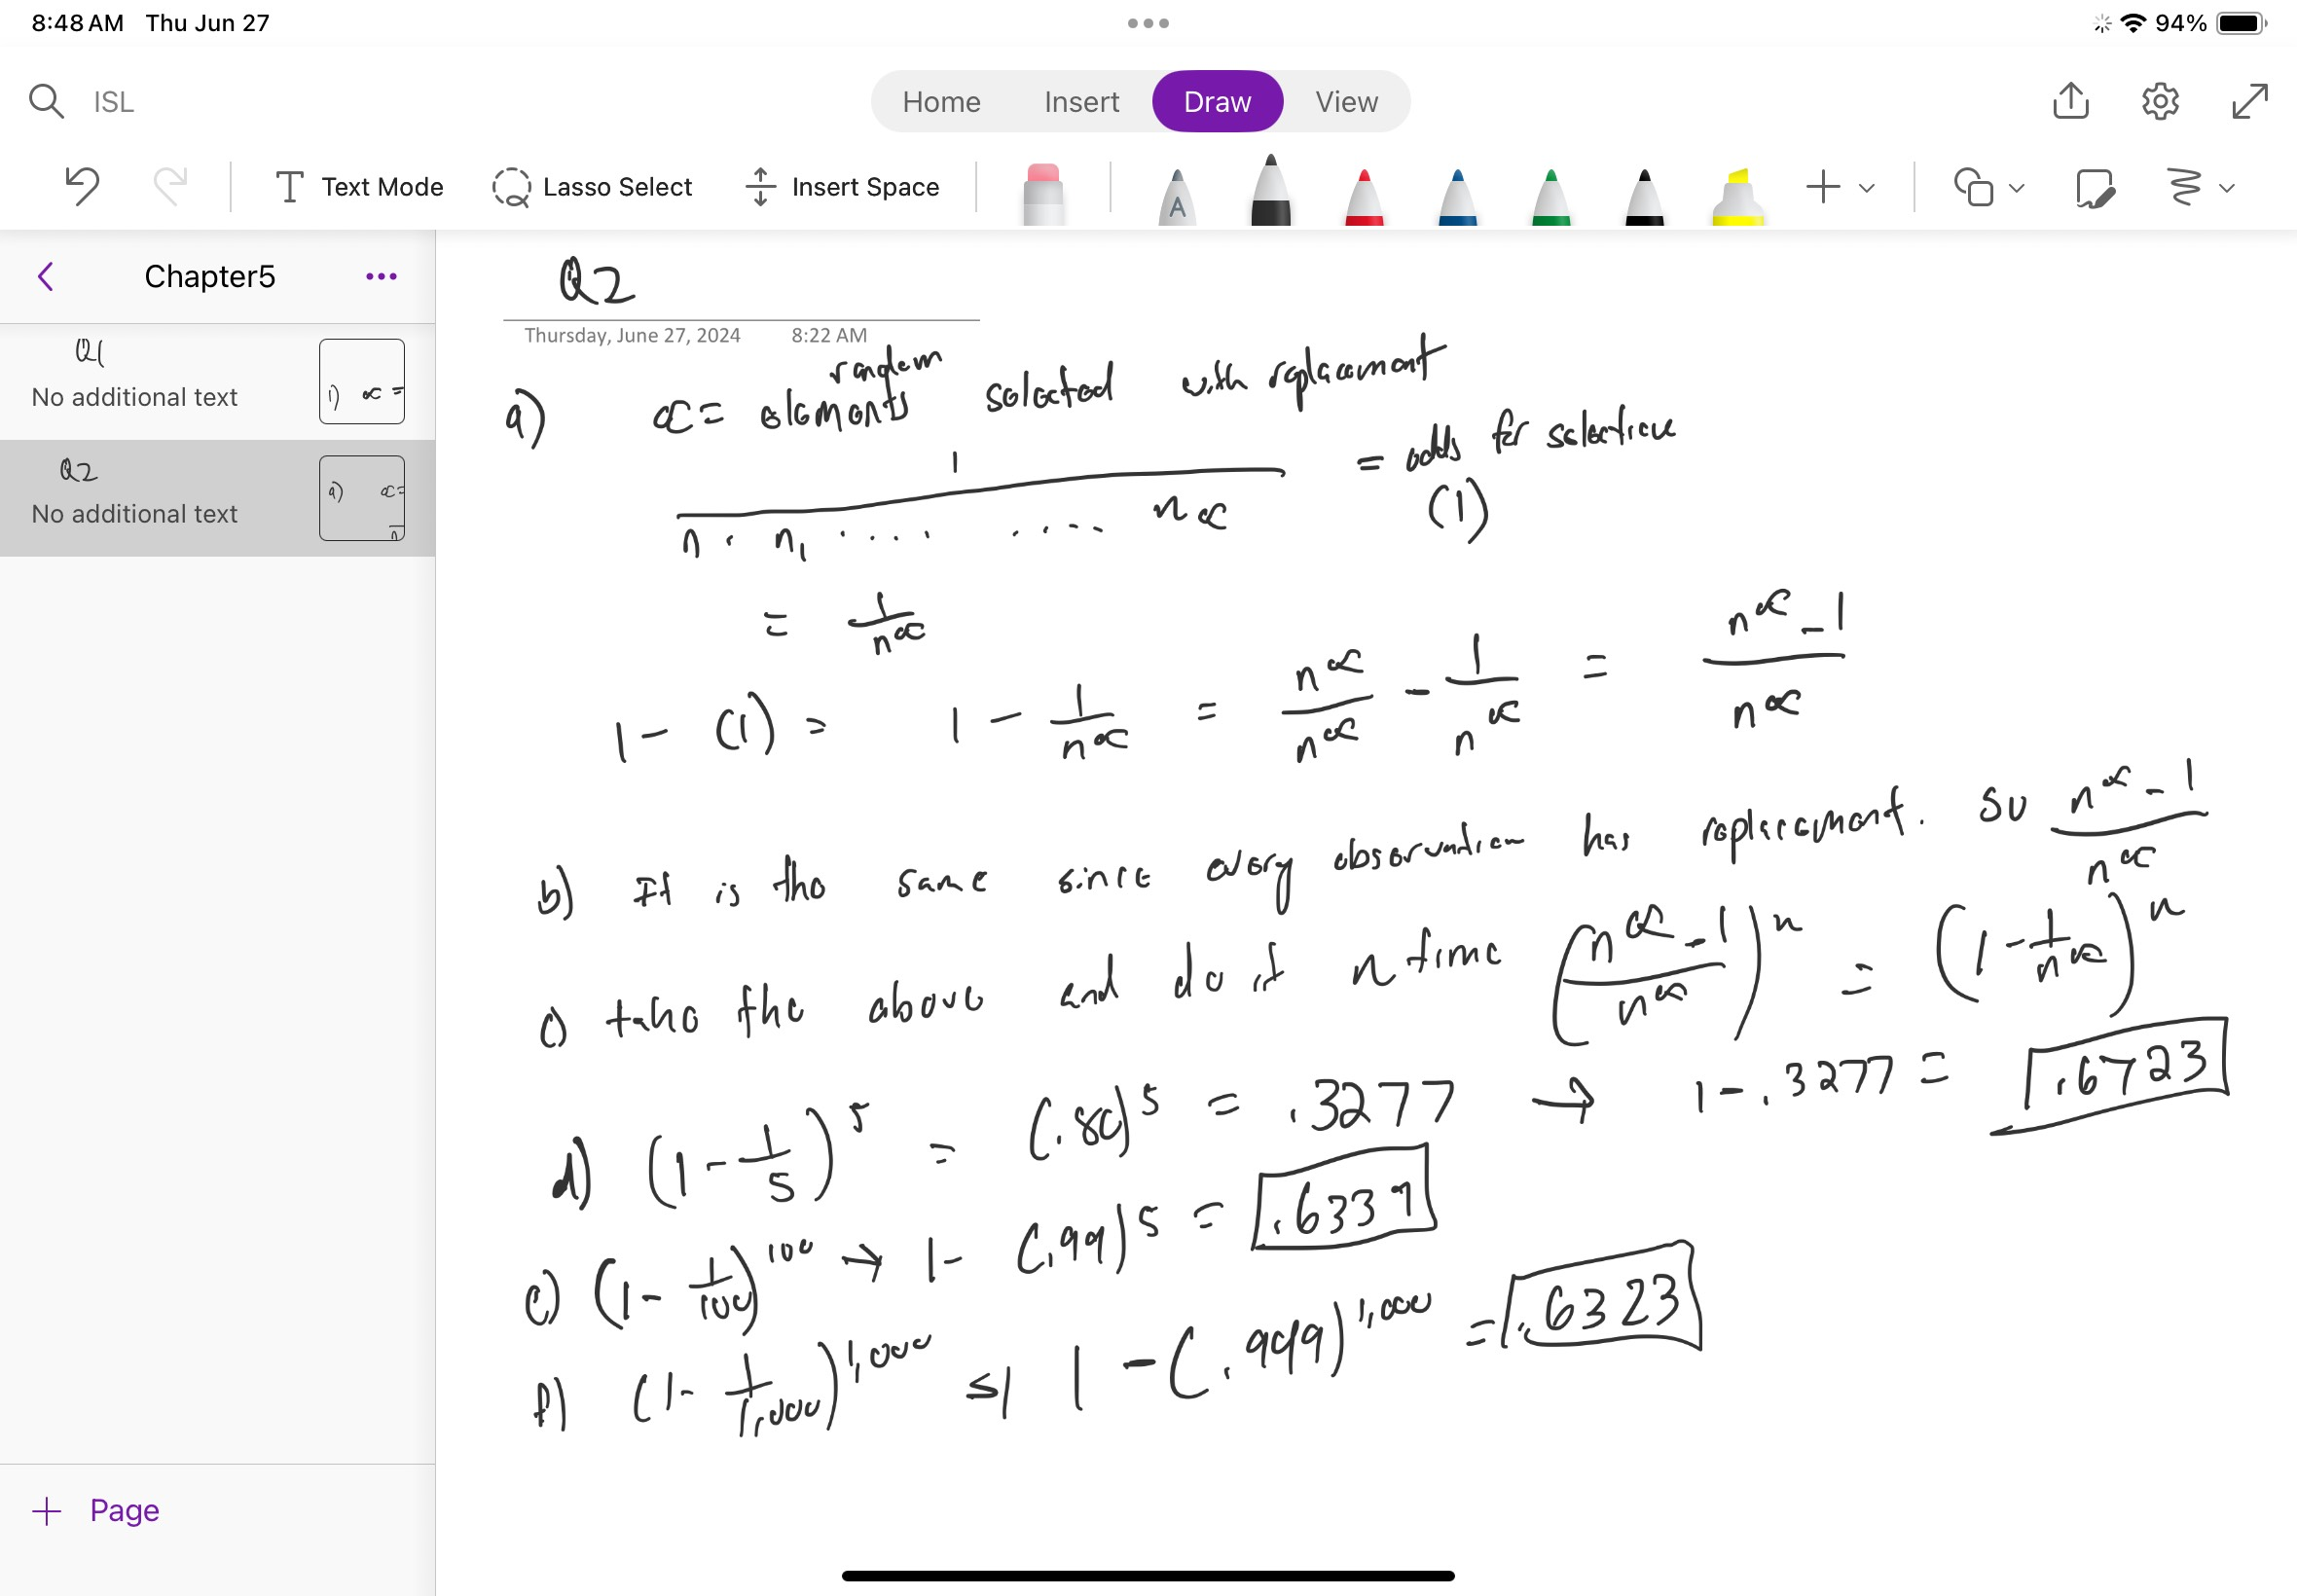



### (g) - Create a plot that displays, for each integer value of n from 1 to 100,000 - the probability that the jth observation is in the bootstrap sample. Comment on what you observe.


Text(0.5, 1.0, 'Varying J and its effect on the prob')

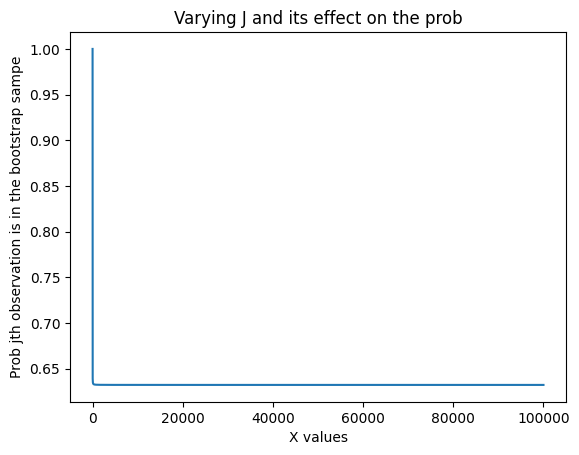

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def inside(n: int) -> int:
  return 1 - (1 - (1/n))** n

X = np.arange(1, 100001)
y = inside(X)
plt.plot(X, y)
plt.xlabel("X values")
plt.ylabel('Prob jth observation is in the bootstrap sampe')
plt.title('Varying J and its effect on the prob')

Text(0.5, 1.0, 'Varying J and its effect on the prob')

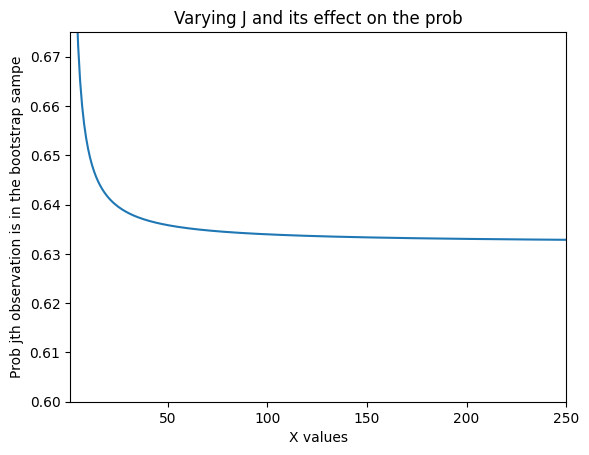

In [7]:

y = inside(X)
plt.plot(X, y)
plt.xlabel("X values")
plt.xlim(1,250)
plt.ylim(.60,.675)
plt.ylabel('Prob jth observation is in the bootstrap sampe')
plt.title('Varying J and its effect on the prob')

#### Results - (g)

As the X Values increase we can see the probability that it is contained inside the $j_{th}$ bootstrap decreases. This makes sense since as n grows it should be harder to pick the same n elements.

## (h) - We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap sample.

In [9]:
store = []
for i in np.arange(1, 10000):
    store += [np.sum((np.random.randint(low=1, high=101, size=100) == 4)) > 0]
np.mean(store)


0.633063306330633

#### Results - (h)

This is as expected from our graphs. Both the graph and the numerical results here show that it should be around a .63 probability as our sample size increases.

## Question 3 - We now review k-fold cross-validation.

### (a) - Explain how k-fold cross-validation is implemented.

* We implement it with first picking the number of k folds. Then we pick $\frac{1}{k}$ fold to be the test and the remaining folds to train. We do this k times so all folds are picked for the test group.

### (b) - What are the advantages and disadvantages of k-fold crossvalidation relative to

>>> i. The validation set approach?

>>> ii. LOOCV?

i)
* Adv : The advantage is limiting the randomness of the elements being choosen. With k fold we will produce a more consistent result everytime. This will give a better estimate on test error. Also have more data to train on since we do k tests so it will have less bias and fit more flexible models better.
* DisAdv : It is computationally more expensive since we have to run it k times compared to 1.

ii)
* Adv: For k > 1 it will be able to be less computationally expensive since it wont have to run as many times. Also using the bias-variance trade off it will have less variance since it won't be as flexible as k = 1.

* DisAdv: LOOCV will have less bias based on the bias- variance trade off. LOOCV uses the maximum number of training points possible. This however will lead to a higher variance.

## Question 4 - Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

* We would use bootstrap to estimate the standard deviation of our prediction. We would use n-cnt resampling trails provided by bootstrap to calculate several different standard deviation predictions. We can get the standard deviation with the SD formula. Do this n times then take the average of the n standard deviations. This will be our answer